C:\Users\Dell\AppData\Local\Temp\ipykernel_7164\861486295.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Average'] = data[years].replace(
C:\Users\Dell\AppData\Local\Temp\ipykernel_7164\861486295.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Average'] = data[years].replace(
C:\Users\Dell\AppData\Local\Temp\ipykernel_7164\861486295.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

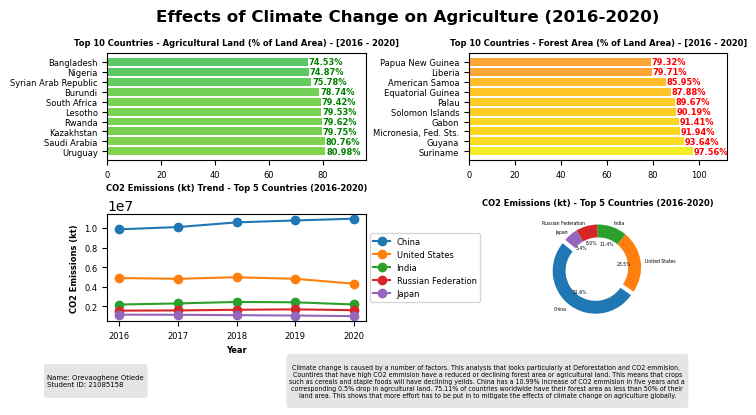

In [1]:
"""
This is a code to show the relationship between climate change 
and agriculture globally.
"""

# Importing libraries for plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to filter data for a specific indicator
def filter_data(climate_change, indicator):
    return climate_change[climate_change['Indicator'] == indicator]

# Function to calculate average, sort data, and select top countries
def process_data(data, years, top_n):
    data.loc[:, 'Average'] = data[years].replace(
        '..', np.nan).astype(float).mean(axis=1)
    return data.sort_values(by='Average', ascending=False).head(top_n)

# Function to create horizontal bar plot
def create_bar_plot(ax, data, color_map, title):
    bar_plot = ax.barh(data['Country'], data['Average'],
                       color=color_map(data['Average']/100))

    # Adjust title font size
    ax.set_title(title, fontsize=6, fontweight='bold')
    ax.set_xlim(0, max(data['Average']) + 15)
    ax.tick_params(axis='x', labelsize=6)  # Reduce x-axis label size
    ax.tick_params(axis='y', labelsize=6)  # Reduce y-axis label size

    for bar, value in zip(bar_plot, data['Average']):
        ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2, 
                f'{value:.2f}%', ha='left', va='center', 
                color='green' if 'Agricultural' in title else 'red',
                fontsize=6, fontweight='bold')

# Function to create time series plot
def create_time_series_plot(ax, data, years, xlabel, ylabel, title):
    data_T = data[years].astype(float).T
    data_T.plot(ax=ax, marker='o', linestyle='-',
                figsize=(8, 4))  # Capture legend

    ax.set_xlabel(xlabel, fontsize=6, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=6, fontweight='bold')
    ax.set_title(title, fontsize=6, fontweight='bold')
    ax.tick_params(axis='x', labelsize=6)  # Reduce x-axis label size
    ax.tick_params(axis='y', labelsize=6)  # Reduce y-axis label size
    # Use mathtext for scientific notation
    plt.rcParams['axes.formatter.use_mathtext'] = True
    plt.rcParams['font.size'] = 3.3  # Set the default font size for mathtext

    # Adjust legend size and position
    legend_labels = [label.get_text() for label in ax.get_legend().get_texts()]
    ax.legend(legend_labels, loc='center left',
              bbox_to_anchor=(1, 0.5), fontsize=6)

# Function to create pie chart
def create_pie_chart(ax, data, explode, title):
    colors = plt.cm.tab10.colors
    ax.pie(data['Total'], labels=data.index, autopct='%1.1f%%', startangle=140,
           explode=explode, colors=colors[:len(data)], 
           wedgeprops=dict(width=0.3))

    # Adjust title font size
    ax.set_title(title, fontsize=6, fontweight='bold')


# Read the CSV file into a DataFrame
climate_change = pd.read_csv("Dataset_file.csv")

# Define the years
years = ['2016', '2017', '2018', '2019', '2020']

# Create a single figure and arrange subplots with larger bottom space
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
# Adjust top space, bottom space, and horizontal space between plots
fig.subplots_adjust(bottom=0.2, top=0.87, wspace=0.4, hspace=0.5)

# Agricultural Land Data
agricultural_land_data = filter_data(
    climate_change, 'Agricultural land (% of land area)')
top_10_countries_agriculture = process_data(agricultural_land_data, years, 10)
create_bar_plot(axs[0, 0], top_10_countries_agriculture, plt.cm.viridis,
                'Top 10 Countries - Agricultural Land (% of Land Area) - [2016 - 2020]')

# Forest Area Data
forest_area_data = filter_data(climate_change, 'Forest area (% of land area)')
top_10_countries_forest = process_data(forest_area_data, years, 10)
create_bar_plot(axs[0, 1], top_10_countries_forest, plt.cm.plasma,
                'Top 10 Countries - Forest Area (% of Land Area) - [2016 - 2020]')

# CO2 Emissions Time Series Plot
co2_emissions_data = filter_data(climate_change, 'CO2 emissions (kt)')
co2_emissions_data.set_index('Country', inplace=True)
co2_emissions_data[years] = co2_emissions_data[years].replace(
    '..', np.nan).astype(float)

co2_top_5_countries = co2_emissions_data[years].sum(
    axis=1).sort_values(ascending=False).head(5)
co2_top_5_data = co2_emissions_data.loc[co2_top_5_countries.index, years]
create_time_series_plot(axs[1, 0], co2_top_5_data, years, 'Year', 
                        'CO2 Emissions (kt)',
                        'CO2 Emissions (kt) Trend - Top 5 Countries (2016-2020)')

# CO2 Emissions Pie Chart
co2_emissions_data['Total'] = co2_emissions_data[years].sum(axis=1)
co2_top_5_countries_pie = co2_emissions_data.sort_values(
    by='Total', ascending=False).head(5)
create_pie_chart(axs[1, 1], co2_top_5_countries_pie, (0.1, 0, 0, 0, 0),
                 'CO2 Emissions (kt) - Top 5 Countries (2016-2020)')

# Create a general title for the plot
fig.suptitle('Effects of Climate Change on Agriculture (2016-2020)',
             fontsize=12, fontweight='bold', y=0.98)

# Add text section to provide explanation
text_content = r'''
Climate change is caused by a number of factors. This analysis that looks particularly at Deforestation and CO2 emmision. 
Countires that have high CO2 emmision have a reduced or declining forest area or agricultural land. This means that crops
such as cereals and staple foods will have declining yeilds. China has a 10.99% increase of CO2 emmision in five years and a
corresponding 0.5% drop in agrcultural land. 75.11% of countries worldwide have their forest area as less than 50% of their 
land area. This shows that more effort has to be put in to mitigate the effects of climate change on agriculture globally.
'''

fig.text(0.6, 0.05, text_content, ha='center', va='center', fontsize=4.5, 
         bbox=dict(facecolor='grey', alpha=0.2, boxstyle='round,pad=0.5', 
                   edgecolor='none'), transform=fig.transFigure)
bbox = fig.texts[-1].get_bbox_patch()
bbox.set_width(0.8)

# Add another text section to display Name and ID
additional_text = r'''
Name: Orevaoghene Otiede
Student ID: 21085158
'''

fig.text(0.05, 0.05, additional_text, ha='left', va='center', fontsize=5, 
         bbox=dict(facecolor='grey', alpha=0.2, boxstyle='round,pad=0.5', 
                   edgecolor='none'), transform=fig.transFigure)


# Show the final plot
plt.show()  
